## Imports

In [19]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import math
%matplotlib  inline

# Import Dataset

In [20]:
df = pd.read_csv('../raw_data/kaggle_data_1k_labeled.csv')

In [21]:
df.head()

,dataset_name,table_name,column_name,label,column_values,column_values_unique,nunique_values,n_values,mean,std,median,skew,kurt,shapiro_wilk_test
0,nareshbhat/health-care-data-set-on-heart-attac...,heart.csv,thalach,int,"['150, 187, 172, 178, 163, 148, 153, 173, 162,...",[150 187 172 178 163 148 153 173 162 174 160 1...,91.0,303.0,149.646865,22.905161,153.00000,-0.537410,-0.061970,0.000066
1,kimjihoo/coronavirusdataset,SearchTrend.csv,coronavirus,float,"['0.00736, 0.00436, 0.00927, 0.01181, 0.00563,...",[7.360000e-03 4.360000e-03 9.270000e-03 1.1810...,326.0,1000.0,2.090660,10.010559,0.00881,6.305825,42.379589,0.000000
2,kimjihoo/coronavirusdataset,Weather.csv,province,cat-multi,"['Daegu, Chungcheongbuk-do, Incheon, Ulsan, Bu...",['Daegu' 'Chungcheongbuk-do' 'Incheon' 'Ulsan'...,16.0,1000.0,NaN,NaN,NaN,NaN,NaN,NaN
3,kimjihoo/coronavirusdataset,PatientInfo.csv,age,cat-multi,"['50s, 30s, 40s, nan, nan, 10s, 20s, 20s, 50s,...",['50s' '30s' '40s' nan '10s' '20s' '70s' '80s'...,10.0,1000.0,NaN,NaN,NaN,NaN,NaN,NaN
4,kimjihoo/coronavirusdataset,Policy.csv,policy_id,int,"['1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 1...",[ 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 ...,61.0,61.0,31.000000,17.752934,31.00000,0.000000,-1.200000,0.025660


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   dataset_name          1000 non-null   object 
 1   table_name            1000 non-null   object 
 2   column_name           1000 non-null   object 
 3   label                 1000 non-null   object 
 4   column_values         991 non-null    object 
 5   column_values_unique  991 non-null    object 
 6   nunique_values        991 non-null    float64
 7   n_values              991 non-null    float64
 8   mean                  480 non-null    float64
 9   std                   480 non-null    float64
 10  median                480 non-null    float64
 11  skew                  479 non-null    float64
 12  kurt                  479 non-null    float64
 13  shapiro_wilk_test     481 non-null    float64
dtypes: float64(8), object(6)
memory usage: 109.5+ KB


In [5]:
df.label.unique()

array(['int', 'float', 'cat-multi', 'other', 'text', 'date', 'cat-binary'],
      dtype=object)

In [6]:
df.loc[df.label == 'date']

,dataset_name,table_name,column_name,label,column_values,column_values_unique,nunique_values,n_values,mean,std,median,skew,kurt,shapiro_wilk_test
21,kaggle/sf-salaries,Salaries.csv,Year,date,"['2012, 2014, 2013, 2013, 2013, 2012, 2013, 20...",[2012 2014 2013 2011],4.0,1000.0,2012.504,1.108699,2012.0,0.005346,-1.337982,4.950920e-29
40,new-york-city/nyc-property-sales,nyc-rolling-sales.csv,SALE DATE,date,"['2017-03-17 00:00:00, 2017-07-19 00:00:00, 20...",['2017-03-17 00:00:00' '2017-07-19 00:00:00' '...,265.0,1000.0,NaN,NaN,NaN,NaN,NaN,NaN
83,fireballbyedimyrnmom/us-counties-covid-19-dataset,us-counties.csv,date,date,"['2021-03-07, 2020-12-26, 2021-02-15, 2021-08-...",['2021-03-07' '2020-12-26' '2021-02-15' '2021-...,495.0,1000.0,NaN,NaN,NaN,NaN,NaN,NaN
103,utkarshxy/who-worldhealth-statistics-2020-comp...,30-70cancerChdEtc.csv,Period,date,"['2015, 2010, 2016, 2015, 2000, 2005, 2015, 20...",[2015 2010 2016 2000 2005],5.0,1000.0,2009.229,6.026681,2010.0,-0.307080,-1.380954,2.274558e-30
108,utkarshxy/who-worldhealth-statistics-2020-comp...,hepatitusBsurfaceAntigen.csv,Period,date,"['2015, 2015, 2015, 2015, 2015, 2015, 2015, 20...",[2015],1.0,194.0,2015.000,0.000000,2015.0,0.000000,0.000000,1.000000e+00
115,utkarshxy/who-worldhealth-statistics-2020-comp...,newHivInfections.csv,Period,date,"['2005, 2005, 2019, 2010, 2015, 2000, 2010, 20...",[2005 2019 2010 2015 2000],5.0,1000.0,2009.803,6.794436,2010.0,-0.090731,-1.348362,7.275372e-27
829,cjgdev/formula-1-race-data-19502017,qualifying.csv,q1,date,"['1:32.173, 1:15.802, nan, 1:16.266, 1:19.623,...",['1:32.173' '1:15.802' nan '1:16.266' '1:19.62...,978.0,1000.0,NaN,NaN,NaN,NaN,NaN,NaN


## cat-binary test

Testing if the column has more than 2 unique values. If the values are numbers, verify if they are 0 and 1.

In [7]:
for index,row in df.iterrows():
    if row['nunique_values'] == 2:
        print(row.column_values_unique)
        values = row.column_values_unique.replace('[','' ).replace(']','' ).split(" ") #need the json output to treat in a correct way and test if they are numbers or strings
        print(values)

[1 0]
['1', '0']
[0 4]
['0', '4']
['vegetarian' 'non vegetarian']
["'vegetarian'", "'non", "vegetarian'"]
[0 1]
['0', '1']
[0 1]
['0', '1']
[0 1]
['0', '1']
[0 1]
['0', '1']
[0 1]
['0', '1']
['Grand Princess' '0.0']
["'Grand", "Princess'", "'0.0'"]
[0 1]
['0', '1']
[0 1]
['0', '1']
[ 0 12]
['', '0', '12']
[ True False]
['', 'True', 'False']
[0 1]
['0', '1']
['No' 'Yes']
["'No'", "'Yes'"]
[1 2]
['1', '2']
[  nan  20.5 236. ]
['', '', 'nan', '', '20.5', '236.', '']
[0 1]
['0', '1']
[0 1]
['0', '1']
[        0 200809184]
['', '', '', '', '', '', '', '', '0', '200809184']
[        0 356404608]
['', '', '', '', '', '', '', '', '0', '356404608']


## Date test

In [22]:
pattern = r'([12]\d{3}-(0[1-9]|1[0-2])-(0[1-9]|[12]\d|3[01]))|((0?[13578]|10|12)(-|\/)(([1-9])|(0[1-9])|([12])([0-9]?)|(3[01]?))(-|\/)((19)([2-9])(\d{1})|(20)([01])(\d{1})|([8901])(\d{1}))|(0?[2469]|11)(-|\/)(([1-9])|(0[1-9])|([12])([0-9]?)|(3[0]?))(-|\/)((19)([2-9])(\d{1})|(20)([01])(\d{1})|([8901])(\d{1})))'
for index,row in df.iterrows():
    if 'date' in row['column_name'].lower():
        df.loc[index,'heuristic_label'] = 'date'
    elif 'period' in row['column_name'].lower():
        df.loc[index,'heuristic_label'] = 'date'
        print(row.column_values_unique)
    elif 'year' in row['column_name'].lower():
        df.loc[index,'heuristic_label'] = 'date'
        print(row.column_values_unique)
    elif re.search(pattern,str(row.column_values_unique)):
        print('regex')
        df.loc[index,'heuristic_label'] = 'date'

regex
[2012 2014 2013 2011]
[2015 2010 2016 2000 2005]
[2015]
[2005 2019 2010 2015 2000]
[2016]


In [23]:
df.loc[df.heuristic_label == 'date']

,dataset_name,table_name,column_name,label,column_values,column_values_unique,nunique_values,n_values,mean,std,median,skew,kurt,shapiro_wilk_test,heuristic_label
12,andrewmvd/trip-advisor-hotel-reviews,tripadvisor_hotel_reviews.csv,Review,text,"[""superb service staff got admit worried hotel...","[""superb service staff got admit worried hotel...",1000.0,1000.0,NaN,NaN,NaN,NaN,NaN,NaN,date
21,kaggle/sf-salaries,Salaries.csv,Year,date,"['2012, 2014, 2013, 2013, 2013, 2012, 2013, 20...",[2012 2014 2013 2011],4.0,1000.0,2012.504,1.108699,2012.0,0.005346,-1.337982,4.950920e-29,date
40,new-york-city/nyc-property-sales,nyc-rolling-sales.csv,SALE DATE,date,"['2017-03-17 00:00:00, 2017-07-19 00:00:00, 20...",['2017-03-17 00:00:00' '2017-07-19 00:00:00' '...,265.0,1000.0,NaN,NaN,NaN,NaN,NaN,NaN,date
83,fireballbyedimyrnmom/us-counties-covid-19-dataset,us-counties.csv,date,date,"['2021-03-07, 2020-12-26, 2021-02-15, 2021-08-...",['2021-03-07' '2020-12-26' '2021-02-15' '2021-...,495.0,1000.0,NaN,NaN,NaN,NaN,NaN,NaN,date
103,utkarshxy/who-worldhealth-statistics-2020-comp...,30-70cancerChdEtc.csv,Period,date,"['2015, 2010, 2016, 2015, 2000, 2005, 2015, 20...",[2015 2010 2016 2000 2005],5.0,1000.0,2009.229,6.026681,2010.0,-0.307080,-1.380954,2.274558e-30,date
108,utkarshxy/who-worldhealth-statistics-2020-comp...,hepatitusBsurfaceAntigen.csv,Period,date,"['2015, 2015, 2015, 2015, 2015, 2015, 2015, 20...",[2015],1.0,194.0,2015.000,0.000000,2015.0,0.000000,0.000000,1.000000e+00,date
115,utkarshxy/who-worldhealth-statistics-2020-comp...,newHivInfections.csv,Period,date,"['2005, 2005, 2019, 2010, 2015, 2000, 2010, 20...",[2005 2019 2010 2015 2000],5.0,1000.0,2009.803,6.794436,2010.0,-0.090731,-1.348362,7.275372e-27,date
116,utkarshxy/who-worldhealth-statistics-2020-comp...,mortalityRateUnsafeWash.csv,Period,cat-multi,"['2016, 2016, 2016, 2016, 2016, 2016, 2016, 20...",[2016],1.0,549.0,2016.000,0.000000,2016.0,0.000000,0.000000,1.000000e+00,date


## Cat-multi test

(array([30.,  3.,  1.,  0.,  1.,  0.,  0.,  1.,  0.,  6.]),
 array([0.001 , 0.1009, 0.2008, 0.3007, 0.4006, 0.5005, 0.6004, 0.7003,
        0.8002, 0.9001, 1.    ]),
 <BarContainer object of 10 artists>)

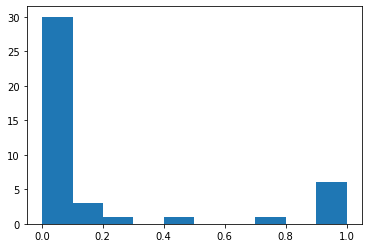

In [10]:
df_cat_multi = df.loc[df.label == 'cat-multi']
plt.hist(df_cat_multi.nunique_values/df_cat_multi.n_values)

(array([26.,  2.,  4.,  2.,  1.,  0.,  0.,  2.,  4.,  1.]),
 array([  1. ,  21.6,  42.2,  62.8,  83.4, 104. , 124.6, 145.2, 165.8,
        186.4, 207. ]),
 <BarContainer object of 10 artists>)

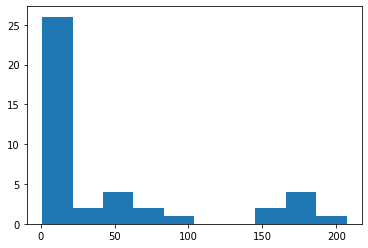

In [11]:
plt.hist(df_cat_multi.nunique_values)

In [12]:
df_cat_multi.head(20)

,dataset_name,table_name,column_name,label,column_values,column_values_unique,nunique_values,n_values,mean,std,median,skew,kurt,shapiro_wilk_test,heuristic_label
2,kimjihoo/coronavirusdataset,Weather.csv,province,cat-multi,"['Daegu, Chungcheongbuk-do, Incheon, Ulsan, Bu...",['Daegu' 'Chungcheongbuk-do' 'Incheon' 'Ulsan'...,16.0,1000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,kimjihoo/coronavirusdataset,PatientInfo.csv,age,cat-multi,"['50s, 30s, 40s, nan, nan, 10s, 20s, 20s, 50s,...",['50s' '30s' '40s' nan '10s' '20s' '70s' '80s'...,10.0,1000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,fernandol/countries-of-the-world,countries of the world.csv,Region,cat-multi,"['ASIA (EX. NEAR EAST) , EASTERN EUROP...",['ASIA (EX. NEAR EAST) ' 'EASTERN EURO...,11.0,227.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24,uciml/zoo-animal-classification,class.csv,Class_Type,cat-multi,"['Mammal, Bird, Reptile, Fish, Amphibian, Bug,...",['Mammal' 'Bird' 'Reptile' 'Fish' 'Amphibian' ...,7.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31,ramjidoolla/ipl-data-set,matches.csv,Season,cat-multi,"['IPL-2017, IPL-2017, IPL-2017, IPL-2017, IPL-...",['IPL-2017' 'IPL-2008' 'IPL-2009' 'IPL-2010' '...,12.0,756.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35,jboysen/mri-and-alzheimers,oasis_longitudinal.csv,Subject ID,cat-multi,"['OAS2_0001, OAS2_0001, OAS2_0002, OAS2_0002, ...",['OAS2_0001' 'OAS2_0002' 'OAS2_0004' 'OAS2_000...,150.0,373.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36,jboysen/mri-and-alzheimers,oasis_longitudinal.csv,Visit,cat-multi,"['1, 2, 1, 2, 3, 1, 2, 1, 2, 3, 1, 3, 4, 1, 2,...",[1 2 3 4 5],5.0,373.0,1.882038,0.922843,2.0,1.041023,0.931798,1.447667e-20,NaN
37,new-york-city/nyc-property-sales,nyc-rolling-sales.csv,TAX CLASS AT PRESENT,cat-multi,"['2, 1, 1, 1, 1, 1, 4, 2, 1, 1, 1, 1, 1, 4, 2,...",['2' '1' '4' '2C' ' ' '2A' '1A' '1B' '2B' '1C'],10.0,1000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41,wsj/college-salaries,degrees-that-pay-back.csv,Undergraduate Major,cat-multi,"['Accounting, Aerospace Engineering, Agricultu...",['Accounting' 'Aerospace Engineering' 'Agricul...,50.0,50.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45,mathurinache/world-happiness-report,2015.csv,Country,cat-multi,"['Switzerland, Iceland, Denmark, Norway, Canad...",['Switzerland' 'Iceland' 'Denmark' 'Norway' 'C...,158.0,158.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
for index,row in df.iterrows():
    if 'province' in row['column_name'].lower():
        df.loc[index,'heuristic_label'] = 'cat-multi'
    elif 'region' in row['column_name'].lower():
        df.loc[index,'heuristic_label'] = 'cat-multi'  
    elif 'country' in row['column_name'].lower():
        df.loc[index,'heuristic_label'] = 'cat-multi'
    elif 'category' in row['column_name'].lower():
        df.loc[index,'heuristic_label'] = 'cat-multi'
    elif 'state' in row['column_name'].lower():
        df.loc[index,'heuristic_label'] = 'cat-multi'
    elif 'city' in row['column_name'].lower():
        df.loc[index,'heuristic_label'] = 'cat-multi'
    elif 'day' in row['column_name'].lower():
        df.loc[index,'heuristic_label'] = 'cat-multi'
    elif 'week' in row['column_name'].lower():
        df.loc[index,'heuristic_label'] = 'cat-multi'
    elif 'location' in row['column_name'].lower():
        df.loc[index,'heuristic_label'] = 'cat-multi'
    elif (row.nunique_values/row.n_values) < 0.05 and row.nunique_values < 10:
        df.loc[index,'heuristic_label'] = 'cat-multi'

In [29]:
df.loc[df.label == 'cat-multi'].head()

,dataset_name,table_name,column_name,label,column_values,column_values_unique,nunique_values,n_values,mean,std,median,skew,kurt,shapiro_wilk_test,heuristic_label
2,kimjihoo/coronavirusdataset,Weather.csv,province,cat-multi,"['Daegu, Chungcheongbuk-do, Incheon, Ulsan, Bu...",['Daegu' 'Chungcheongbuk-do' 'Incheon' 'Ulsan'...,16.0,1000.0,NaN,NaN,NaN,NaN,NaN,NaN,cat-multi
3,kimjihoo/coronavirusdataset,PatientInfo.csv,age,cat-multi,"['50s, 30s, 40s, nan, nan, 10s, 20s, 20s, 50s,...",['50s' '30s' '40s' nan '10s' '20s' '70s' '80s'...,10.0,1000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,fernandol/countries-of-the-world,countries of the world.csv,Region,cat-multi,"['ASIA (EX. NEAR EAST) , EASTERN EUROP...",['ASIA (EX. NEAR EAST) ' 'EASTERN EURO...,11.0,227.0,NaN,NaN,NaN,NaN,NaN,NaN,cat-multi
24,uciml/zoo-animal-classification,class.csv,Class_Type,cat-multi,"['Mammal, Bird, Reptile, Fish, Amphibian, Bug,...",['Mammal' 'Bird' 'Reptile' 'Fish' 'Amphibian' ...,7.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31,ramjidoolla/ipl-data-set,matches.csv,Season,cat-multi,"['IPL-2017, IPL-2017, IPL-2017, IPL-2017, IPL-...",['IPL-2017' 'IPL-2008' 'IPL-2009' 'IPL-2010' '...,12.0,756.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Text test

In [30]:
df_text = df.loc[df.label == 'text']
df_text

,dataset_name,table_name,column_name,label,column_values,column_values_unique,nunique_values,n_values,mean,std,median,skew,kurt,shapiro_wilk_test,heuristic_label
12,andrewmvd/trip-advisor-hotel-reviews,tripadvisor_hotel_reviews.csv,Review,text,"[""superb service staff got admit worried hotel...","[""superb service staff got admit worried hotel...",1000.0,1000.0,NaN,NaN,NaN,NaN,NaN,NaN,date
13,kaggle/kaggle-survey-2017,freeformResponses.csv,CoursePlatformFreeForm,text,"['nan, nan, nan, nan, udemy, nan, nan, nan, na...","[nan 'udemy' 'Udemi' 'Udemy,lynda' 'Udemy' 'Da...",17.0,1000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,kaggle/kaggle-survey-2017,freeformResponses.csv,HardwarePersonalProjectsFreeForm,text,"['nan, nan, nan, nan, nan, nan, nan, nan, nan,...",[nan '‰ÛÎBasic Laptop (Linux)' 'windows' 'Note...,8.0,1000.0,NaN,NaN,NaN,NaN,NaN,NaN,cat-multi
15,kaggle/kaggle-survey-2017,freeformResponses.csv,PastJobTitlesFreeForm,text,"['nan, nan, nan, nan, nan, nan, nan, nan, nan,...",[nan 'Director of Programming' 'Quant ' 'proje...,104.0,1000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,kaggle/kaggle-survey-2017,freeformResponses.csv,WorkToolsFreeForm2,text,"['nan, nan, nan, nan, nan, nan, nan, nan, nan,...",[nan 'Hortonworks' 'scikit-image' 'Dlib' 'scik...,8.0,1000.0,NaN,NaN,NaN,NaN,NaN,NaN,cat-multi
17,kaggle/kaggle-survey-2017,freeformResponses.csv,WorkFrequencySelect3FreeForm,text,"['nan, nan, nan, nan, nan, nan, nan, nan, nan,...",[nan],0.0,1000.0,NaN,NaN,NaN,NaN,NaN,1.0,cat-multi
18,kaggle/kaggle-survey-2017,freeformResponses.csv,SalaryChangeFreeForm,text,"[""nan, nan, about 40%, nan, nan, nan, nan, i'm...","[nan 'about 40%' ""i'm student and i don't reci...",6.0,1000.0,NaN,NaN,NaN,NaN,NaN,NaN,cat-multi
105,utkarshxy/who-worldhealth-statistics-2020-comp...,reproductiveAgeWomen.csv,Indicator,text,['Married or in-union women of reproductive ag...,['Married or in-union women of reproductive ag...,1.0,119.0,NaN,NaN,NaN,NaN,NaN,NaN,cat-multi
983,osmi/mental-health-in-tech-2016,mental-heath-in-tech-2016_20161114.csv,"If yes, what condition(s) have you been diagno...",text,"['nan, nan, nan, nan, Anxiety Disorder (Genera...","[nan\n 'Anxiety Disorder (Generalized, Social,...",102.0,1000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
for index,row in df.iterrows():
    if math.isnan(row['mean']) and math.isnan(row['std']) and math.isnan(row['median']) and math.isnan(row['skew']) and math.isnan(row['kurt']) and (row.nunique_values/row.n_values) > 0.8 :
        df.loc[index,'heuristic_label'] = 'text'

In [17]:
df.loc[df.heuristic_label == 'text']

,dataset_name,table_name,column_name,label,column_values,column_values_unique,nunique_values,n_values,mean,std,median,skew,kurt,shapiro_wilk_test,heuristic_label
10,fernandol/countries-of-the-world,countries of the world.csv,Pop. Density (per sq. mi.),float,"['48,0, 124,6, 13,8, 290,4, 152,1, 9,7, 132,1,...","['48,0' '124,6' '13,8' '290,4' '152,1' '9,7' '...",219.0,227.0,NaN,NaN,NaN,NaN,NaN,NaN,text
12,andrewmvd/trip-advisor-hotel-reviews,tripadvisor_hotel_reviews.csv,Review,text,"[""superb service staff got admit worried hotel...","[""superb service staff got admit worried hotel...",1000.0,1000.0,NaN,NaN,NaN,NaN,NaN,NaN,text
24,uciml/zoo-animal-classification,class.csv,Class_Type,cat-multi,"['Mammal, Bird, Reptile, Fish, Amphibian, Bug,...",['Mammal' 'Bird' 'Reptile' 'Fish' 'Amphibian' ...,7.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,text
41,wsj/college-salaries,degrees-that-pay-back.csv,Undergraduate Major,cat-multi,"['Accounting, Aerospace Engineering, Agricultu...",['Accounting' 'Aerospace Engineering' 'Agricul...,50.0,50.0,NaN,NaN,NaN,NaN,NaN,NaN,text
42,wsj/college-salaries,degrees-that-pay-back.csv,Starting Median Salary,int,"['$46,000.00, $57,700.00, $42,600.00, $36,800....","['$46,000.00' '$57,700.00' '$42,600.00' '$36,8...",43.0,50.0,NaN,NaN,NaN,NaN,NaN,NaN,text
43,aaron7sun/stocknews,Combined_News_DJIA.csv,Top6,other,['Two Israel soldiers suspected of flotilla th...,['Two Israel soldiers suspected of flotilla th...,1000.0,1000.0,NaN,NaN,NaN,NaN,NaN,NaN,text
45,mathurinache/world-happiness-report,2015.csv,Country,cat-multi,"['Switzerland, Iceland, Denmark, Norway, Canad...",['Switzerland' 'Iceland' 'Denmark' 'Norway' 'C...,158.0,158.0,NaN,NaN,NaN,NaN,NaN,NaN,text
71,mariaren/covid19-healthy-diet-dataset,Food_Supply_kcal_Data.csv,Country,cat-multi,"[""Afghanistan, Albania, Algeria, Angola, Antig...",['Afghanistan' 'Albania' 'Algeria' 'Angola' 'A...,170.0,170.0,NaN,NaN,NaN,NaN,NaN,NaN,text
754,antgoldbloom/covid19-data-from-john-hopkins-un...,RAW_us_deaths.csv,Combined_Key,int,"[""Dallas, Arkansas, US, Pepin, Wisconsin, US, ...","['Dallas, Arkansas, US' 'Pepin, Wisconsin, US'...",1000.0,1000.0,NaN,NaN,NaN,NaN,NaN,NaN,text
828,cjgdev/formula-1-race-data-19502017,constructors.csv,constructorRef,other,"['mclaren, bmw_sauber, williams, renault, toro...",['mclaren' 'bmw_sauber' 'williams' 'renault' '...,208.0,208.0,NaN,NaN,NaN,NaN,NaN,NaN,text


## INT FLOAT test

In [36]:
for index,row in df.iterrows():
    if math.isnan(row['mean'])==False and math.isnan(row['std'])==False and math.isnan(row['median'])==False and math.isnan(row['skew'])==False and math.isnan(row['kurt'])==False and (row.nunique_values/row.n_values) > 0.8:
        print(row.label)

int
int
float
other
int
float
float
float
float
float
float
float
float
float
float
float
float
float
float
float
float
float
float
float
float
float
float
int
int
int
int
int
int
int
int
int
int
int
int
int
int
int
int
int
int
int
int
int
int
int
int
int
int
int
int
int
int
int
int
int
int
int
int
int
int
int
int
int
int
int
int
int
int
int
int
int
int
int
int
int
int
int
int
int
int
int
int
int
int
int
int
int
int
int
int
int
int
int
int
int
int
int
int
int
int
int
float
float
float
cat-multi
cat-multi
float
int
float
float
float
float
float
float
float
float
float
float
float
int
float
float
float
int
float
float
float
float
float
float
float
float
float
int
float
int
float
float
float
float
float
float
float
float
float
float
float
float
float
float
